<a href="https://colab.research.google.com/github/JayJay9x/my_portfolio/blob/main/Copy_of_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making investing firm by diving in the dataset of Unicorn Companies.

In [17]:
#connect the dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
companies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unicorn_Companies_project/Unicorn_Companies.csv')

In [20]:
# Let see what we have!
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [21]:
# More detail.
companies.info()
companies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


(1074, 10)

In [22]:
# Date Joined to datetime.
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
# Any duplicated record here?
companies.duplicated().sum()

<ipython-input-22-c0d71b48e1b2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


0

There are no need to drop_duplicates right!

Let begin the EDA journey!

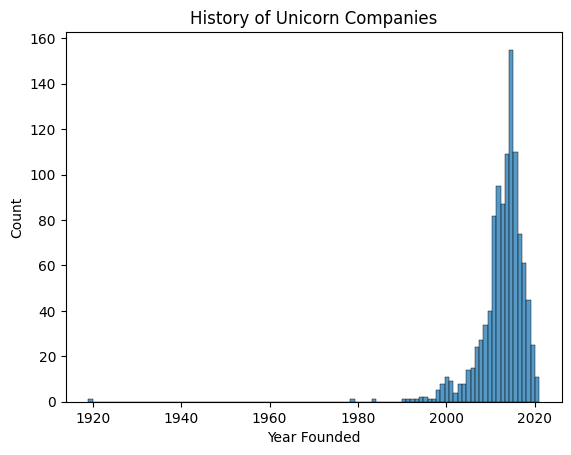

In [23]:
# Discover the unicorn companies history.
companies['Year Founded'].sort_values().value_counts()
sns.histplot(companies['Year Founded'])
plt.title('History of Unicorn Companies')
plt.show()

I have the statement that the older companies the less chance to become Unicorn.

In [24]:
''' To make deeper understanding in the route of Unicorn companies,
I will consider how long it takes to become Unicorn of each Insdustry.'''

companies['Year To Join'] = companies['Date Joined'].dt.year - companies['Year Founded']
route_to_unicorn = companies.groupby('Industry')['Year To Join'].mean().round(2).sort_values(ascending=True).reset_index()

In [25]:
#convert the currency as B to billion in Valuation and M to Million in Funding

def convert_currency(val):
  """Converts currency values from 'B' to billion and 'M' to million."""
  if isinstance(val, str):
    if val.endswith('B'):
      return float(int(val[1:-1])) * 1000000000
    elif val.endswith('M'):
      return float(int(val[1:-1])) * 1000000
    else:
      return 0
  return val


companies['Valuation'] = companies['Valuation'].apply(convert_currency).astype(float)
companies['Funding'] = companies['Funding'].apply(convert_currency).astype(float)
companies['Profit Returns'] = companies['Valuation'] - companies['Funding']
companies

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year To Join,Profit Returns
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5,1.720000e+11
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,9.300000e+10
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10,9.800000e+10
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4,9.300000e+10
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6,4.200000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",5,6.210000e+08
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,9.900000e+08,"58.com, Tencent Holdings",2,1.000000e+07
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,8.000000e+07,"Xingwang Investment Management, China Capital ...",3,9.200000e+08
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North...",16,2.080000e+08


In [26]:
ProfitReturns_unicorn = companies.groupby('Industry')['Profit Returns'].mean().round(2).sort_values(ascending=True).reset_index()
result_table = pd.merge(route_to_unicorn, ProfitReturns_unicorn, on='Industry', how='left')
result_table

,Industry,Year To Join,Profit Returns
0,Auto & transportation,5.03,2.062129e+09
1,Artificial Intelligence,5.36,1.193000e+09
2,Hardware,5.94,2.282794e+09
3,Artificial intelligence,5.97,4.343493e+09
4,Mobile & telecommunications,6.32,1.950421e+09
5,E-commerce & direct-to-consumer,6.43,3.167234e+09
6,Fintech,6.54,3.455375e+09
7,Travel,6.57,2.383857e+09
8,Cybersecurity,6.80,2.141360e+09
9,"Supply chain, logistics, & delivery",6.93,2.326439e+09


In [27]:
# The average time and ammount for those investing firm
avg_investing = result_table.describe()
avg_investing

,Year To Join,Profit Returns
count,16.000000,1.600000e+01
mean,6.849375,2.663316e+09
std,1.007224,7.708162e+08
min,5.030000,1.193000e+09
25%,6.232500,2.198070e+09
50%,6.685000,2.465209e+09
75%,7.802500,3.180506e+09
max,8.190000,4.343493e+09


Combines a bar chart and a line chart to analyze Profit Returns by Year To Join, allowing for both detailed comparison and trend analysis along Industry.

In [28]:

import altair as alt

# Create the bar chart with tooltip and industry label
bar_chart = alt.Chart(result_table).mark_bar().encode(
    x=alt.X('Year To Join', title='Year To Join'),
    y=alt.Y('Profit Returns', title='Profit Returns'),
    tooltip=['Industry', 'Year To Join', 'Profit Returns']
)

# Add Industry label on each bar
text = bar_chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-10,  # Adjust vertical position of the label
    angle=45  # Rotate label by 45 degrees
).encode(
    text='Industry'
)

# Create the line chart showing average Profit Returns by Year To Join
line_chart = alt.Chart(avg_investing).mark_line(color='red').encode(
    x='Year To Join',
    y='Profit Returns',
    tooltip=['Year To Join', 'Profit Returns']
)

# Combine bar chart and line chart
combined_chart = (bar_chart + text + line_chart).properties(
    width=1000,
    height=300,
    title="Profit Returns by Year To Join"
)

combined_chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

*Summary*

This project analyzes the dataset of Unicorn Companies to identify potential investment opportunities.

**Key aspects of the project:**

1. **Data Exploration & Preprocessing:**
   - Loads the dataset of Unicorn Companies.
   - Cleans the data by converting 'Date Joined' to datetime and handling potential duplicates.
   - Explores the history of Unicorn Companies through the 'Year Founded' distribution.


2. **Analyzing Investment Potential:**
   - Calculates the "Year To Join" (the time it takes for a company to become a Unicorn).
   - Groups companies by Industry and calculates the average "Year To Join" and "Profit Returns" (Valuation - Funding).
   - Creates a table that combines both average "Year To Join" and "Profit Returns" by industry.

3. **Visualization & Insights:**
   - Uses Altair to generate a combined chart with bar chart and line chart.
   - Bar chart analyzes the Profit Returns by Year To Join, allowing for comparison across Industries.
   - Line chart shows the average Profit Returns by Year To Join, revealing any trends or patterns in the data.
   -  It aims to identify industries with shorter routes to unicorn status and potentially high profit returns, providing valuable insights for investment firms.


**Overall, the project aims to provide a data-driven approach to selecting promising industries and companies for investment, leveraging the insights gained from analyzing the historical data of Unicorn Companies.**
